In [1]:
import pygmt
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def hatakeyama_et_al_permeability(Y_flat, P_0, k_0, gamma, solid_density):
    P_vals = np.abs(9.81 * solid_density * Y_flat) / 1e6
    k_vals = k_0 * np.exp(-gamma * (P_vals - P_0))
    return k_vals

def powerlaw_permeability(Y_flat, a, b):
    log_permeability = a - b * np.log10(abs(Y_flat/1e3) + 1)
    return 10**log_permeability

def kuang_jiao_permeability(Y_flat, log_kr, log_ks, alpha):
    log_permeability = log_kr + (log_ks - log_kr) * np.power((1 + abs(Y_flat/1e3)), -alpha)
    return 10**log_permeability

def my_permeability(Y_flat, depth_data, perm_data, P_0, k_0, gamma, solid_density):

    p = np.polyfit(abs(depth_data), np.log10(perm_data), deg=1)
    linear_perm_fit = np.zeros(len(Y_flat))
    
    for j in range(len(Y_flat)):
        for i in range(len(p)):
            linear_perm_fit[j] += p[i] * np.abs(Y_flat[j])**(len(p) - 1 - i)

    hatakeyama_perm = hatakeyama_et_al_permeability(Y_flat, P_0, k_0, gamma, solid_density)
    for m in range(len(hatakeyama_perm)):
        if linear_perm_fit[m] <= np.log10(hatakeyama_perm[m]):
            linear_perm_fit[m] = np.log10(hatakeyama_perm[m])

    return 10**linear_perm_fit

In [3]:
P_0 = 100 # MPa
solid_density = 3000 # kg/m3
depth_vals = np.linspace(0, 11e3, 1000) # m

perm_depths = np.array([1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]) # m
perms = np.log10(np.array([1e-11, 1e-13, 5e-14, 1e-15, 5e-16, 1e-16, 2e-17, 1e-17, 1e-17, 1e-17, 8e-18, 6e-18, 5e-18]))

hatakeyama_high_gamma = 3.3e-2
hatakeyama_high_k     = 3.5e-19

hatakeyama_mid_gamma = 2.7e-2
hatakeyama_mid_k     = 6.1e-20

hatakeyama_low_gamma = 2.9e-2
hatakeyama_low_k     = 2.3e-21

a = -16.4
b = 3

log_kr = -19
log_ks = -12
alpha  = 1.8

kuang_jiao = np.log10(kuang_jiao_permeability(depth_vals, log_kr, log_ks, alpha))
power_law  = np.log10(powerlaw_permeability(depth_vals, a, b))

high_serp  = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, hatakeyama_high_k, hatakeyama_high_gamma, solid_density))
mid_serp   = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, hatakeyama_mid_k, hatakeyama_mid_gamma, solid_density))
low_serp   = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, hatakeyama_low_k, hatakeyama_low_gamma, solid_density))

gamma1 = 2.7e-2
gamma2 = 2.8e-2
gamma3 = 2.4e-2
gamma4 = 3.6e-2
gamma5 = 2.7e-2
gamma6 = 3.6e-2

k1 = 6.0e-20
k2 = 6.1e-21
k3 = 1.3e-19
k4 = 2.2e-19
k5 = 6.1e-20
k6 = 2e-23

serp1 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k1, gamma1, solid_density))
serp2 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k2, gamma2, solid_density))
serp3 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k3, gamma3, solid_density))
serp4 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k4, gamma4, solid_density))
serp5 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k5, gamma5, solid_density))
serp6 = np.log10(my_permeability(depth_vals, perm_depths, 10**perms, P_0, k6, gamma6, solid_density))

In [89]:
75 / 5

15.0

gmtset [ERROR]: Pen name None not recognized!
gmtset [WARNING]: Representation of pen width (None) not recognized. Using default.


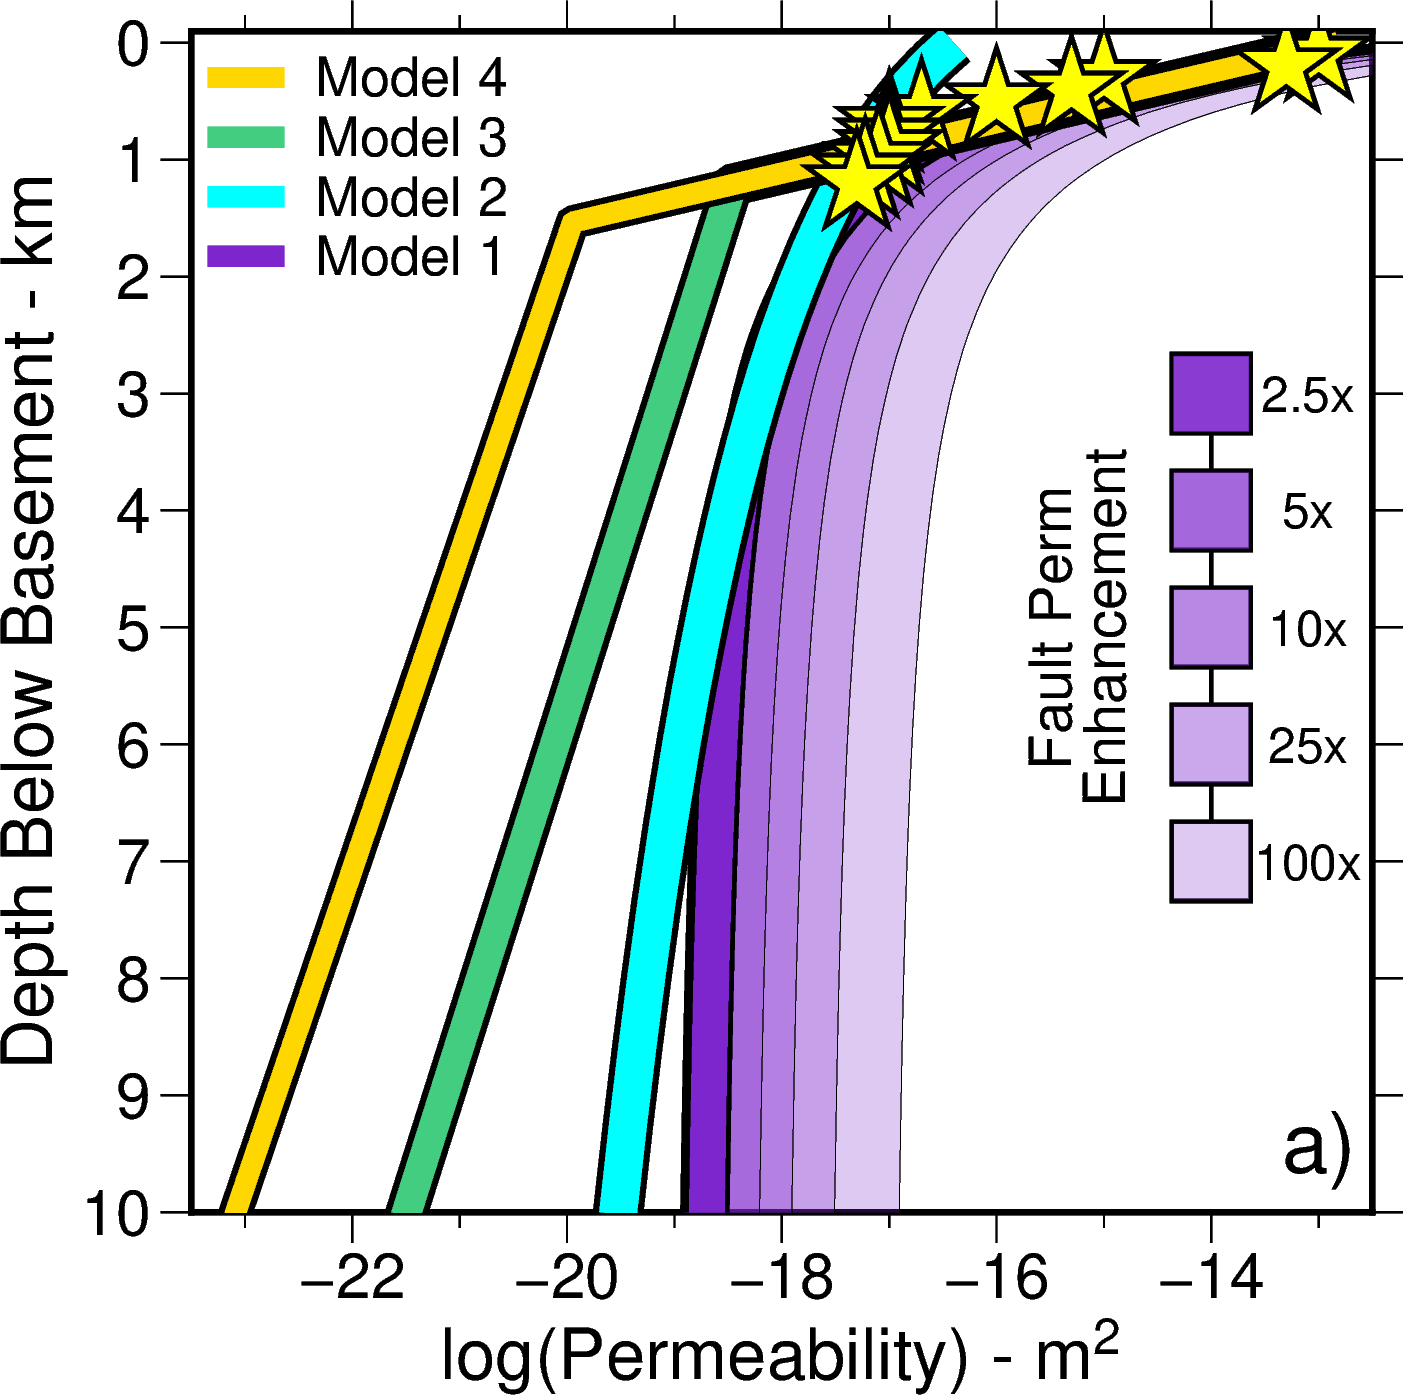

In [6]:
line_thickness = "10p"
fig = pygmt.Figure()
pygmt.config(FONT_LABEL='17p', MAP_LABEL_OFFSET='0.25', MAP_TICK_PEN_PRIMARY=None, FONT_ANNOT_PRIMARY='15p',
             MAP_TICK_LENGTH_PRIMARY=0.25)
region = [-23.5, -12.5, -0.1, 10]
fig.basemap(region=region, projection="X10c/-10c", frame=["WSne", "xa2f1+llog(Permeability) - m@+2@+", "ya1+lDepth Below Basement - km"])

fault_perm_x = np.zeros(5) - 14
fault_perm_y = np.array([3, 4, 5, 6, 7])
array_transparency = np.array([10, 30, 45, 60, 75])

fig.plot(x=fault_perm_x, y=fault_perm_y, pen="1p,black")
fig.plot(x=fault_perm_x, y=fault_perm_y, style="s0.95c", fill="white", pen="1p,black")
fig.plot(x=fault_perm_x, y=fault_perm_y, style="s0.9c", fill="purple3", transparency=array_transparency)

test_depth_vals = np.concatenate((depth_vals, np.flip(depth_vals)))/1e3

test_kj = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(1))))
test_kj1 = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(2.5))))
test_kj2 = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(5))))
test_kj3 = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(10))))
test_kj4 = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(25))))
test_kj5 = np.concatenate((kuang_jiao, np.flip(kuang_jiao + np.log10(100))))

a_val = 75
fig.plot(x=test_kj1, y=test_depth_vals, fill="purple3", transparency=0)

fig.plot(x=test_kj2, y=test_depth_vals, fill="purple3", transparency=a_val)

fig.plot(x=test_kj3, y=test_depth_vals, fill="purple3", transparency=a_val)

fig.plot(x=test_kj4, y=test_depth_vals, fill="purple3", transparency=a_val)

fig.plot(x=test_kj5, y=test_depth_vals, fill="purple3", transparency=a_val)

fig.plot(x=kuang_jiao + np.log10(1), y=depth_vals/1e3, pen="2p,black")
fig.plot(x=kuang_jiao + np.log10(2.5), y=depth_vals/1e3, pen="1p,black")
fig.plot(x=kuang_jiao + np.log10(5), y=depth_vals/1e3, pen="0.1p,black")
fig.plot(x=kuang_jiao + np.log10(10), y=depth_vals/1e3, pen="0.1p,black")
fig.plot(x=kuang_jiao + np.log10(25), y=depth_vals/1e3, pen="0.1p,black")
fig.plot(x=kuang_jiao + np.log10(100), y=depth_vals/1e3, pen="0.1p,black")

fig.plot(x=power_law, y=depth_vals/1e3, pen="12p,black")
fig.plot(x=power_law, y=depth_vals/1e3, pen="9p,cyan")

fig.plot(x=mid_serp, y=depth_vals/1e3, pen="10p,black")
fig.plot(x=mid_serp, y=depth_vals/1e3, pen="7p,seagreen3")

fig.plot(x=low_serp, y=depth_vals/1e3, pen="8p,black")
fig.plot(x=low_serp, y=depth_vals/1e3, pen="5p,gold")

fig.plot(x=perms, y=perm_depths / 1e3, style="a0.9c", pen="1p,black", fill="yellow")

fig.text(x=-13, y=9.4, text="a)", font="20p")

fig.text(x=-13.1, y=3, text="2.5x", font="12p")
fig.text(x=-13.1, y=4, text="5x", font="12p")
fig.text(x=-13.1, y=5, text="10x", font="12p")
fig.text(x=-13.1, y=6, text="25x", font="12p")
fig.text(x=-13.1, y=7, text="100x", font="12p")

fig.text(x=-15.5, y=5, text="Fault Perm", font="14p", angle=90)
fig.text(x=-15, y=5, text="Enhancement", font="14p", angle=90)

fig.plot(x=low_serp + 1000, y=depth_vals/1e3, pen="5p,gold", label="Model 4")
fig.plot(x=mid_serp + 1000, y=depth_vals/1e3, pen="5p,seagreen3", label="Model 3")
fig.plot(x=power_law + 1000, y=depth_vals/1e3, pen="5p,cyan", label="Model 2")
fig.plot(x=kuang_jiao + 1000, y=depth_vals/1e3, pen="5p,purple3", label="Model 1")

pygmt.config(FONT_ANNOT_PRIMARY='13p')
fig.legend(position="jTL", box=False)


fig.savefig(fname="full_perm.png")
fig.show()